#📌 Extracción

##Conociendo los datos

Telecom X es una empresa de telecomunicaciones. La empresa está enfrentando un alto índice de evasión de clientes y aún no han identificado el problema de esta evasión. Para ello, te han proporcionado algunos datos en los que tendrás que buscar, tratar y realizar un análisis exploratorio para, una vez limpiados estos datos, poder proporcionárselos al equipo de ciencia de datos. De esta manera, podrán realizar un análisis predictivo y determinar de dónde proviene esta evasión de clientes.

###Extracción de datos

In [1]:
import pandas as pd
import json
import requests

url='https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'
response= requests.get(url)

if response.status_code == 200:
    data = response.json()
else:
    raise Exception(f"Error al acceder a la API: {response.status_code}")


In [2]:
df = pd.DataFrame(data)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [3]:
df = pd.json_normalize(data)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

####Renombrando las columnas

In [5]:
columnas = []
for key, item in data[0].items():
    if type(item) is dict:
        for key_1, item_1 in item.items():
            if type(item_1) is dict:
                for key_2, item_2 in item_1.items():
                    columnas.append(key_2)
            else:
                columnas.append(key_1)
    else:
        columnas.append(key)

df.columns = columnas
df.rename(columns = {'Monthly' : 'Charges_Monthly', 'Total' : 'Charges_Total'}, inplace = True)

df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly',
       'Charges_Total'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


###Identificacion de variables y transformación de variables

*   ***ID único:***
      customerID → identificador, no aporta para análisis, solo para referencia. Lo descartaría del modelo.


*   ***Variable objetivo (target):***
     Churn (sí/no) → convertir a binaria (1 = Yes, 0 = No)


*  ***Variables categóricas nominales (texto, sin orden):***
       gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod.
       Estas se codifican (one-hot encoding o label encoding).
       Estas se codifican (one-hot encoding o label encoding).

*   ***Variables numéricas:***
      SeniorCitizen (ya es binaria 0/1, pero se puede dejar como está).
      tenure (meses de permanencia, puede normalizarse o agruparse en rangos).
      Charges_Monthly (gasto mensual, numérica continua).
      Charges_Total (ojo: aparece como object, hay que transformarla).








Convertir Charges Totales a float

In [7]:
df["Charges_Total"] = pd.to_numeric(df["Charges_Total"], errors="coerce").fillna(0)


####Convertir "Churn"(variable respuesta: evasión) a binaria

In [8]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

####Variables de respuesta tipo “Yes/No/No internet service”:

Reemplazar "No internet service" → "No".

Reemplazar "No phone service" → "No".

Convertirlas en 1

In [9]:
cols_yes_no = ["MultipleLines", "OnlineSecurity", "OnlineBackup",
               "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

for col in cols_yes_no:
    df[col] = df[col].replace({"No internet service": "No", "No phone service": "No"})
    df[col] = df[col].map({"Yes": 1, "No": 0})

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   float64
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


###Creación de columna de cuentas diarias

In [11]:
df['cuentas diarias']= df['Charges_Monthly']/30
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,cuentas diarias
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,Yes,0,DSL,...,0,1,1,0,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,No,No,9,Yes,1,DSL,...,0,0,0,1,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,No,No,4,Yes,0,Fiber optic,...,1,0,0,0,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,Yes,No,13,Yes,0,Fiber optic,...,1,0,1,1,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,Yes,No,3,Yes,0,Fiber optic,...,0,1,1,0,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

###Analisis de las metricas del dataset

In [12]:
df.describe()

,Churn,SeniorCitizen,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Charges_Monthly,Charges_Total,cuentas diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.265370,0.162653,32.346498,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,64.720098,2277.182035,2.157337
std,0.441561,0.369074,24.571773,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.300000,1389.200000,2.343333
75%,1.000000,0.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


###Distribución de evasión

####Conteo de evasion en tabla

Primero revisamos las proporciones en números y porcentajes:

In [13]:
evasion_clientes_normalizado= df["Churn"].value_counts(normalize=True)*100
evasion_clientes_normalizado

,proportion
Churn,
0.0,73.463013
1.0,26.536987


####Gráfico de barras

Un gráfico simple para ver la diferencia en cantidades:


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipython-input-1852672696.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Churn", data=df, palette="Set2")
/tmp/ipython-input-1852672696.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No", "Sí"])


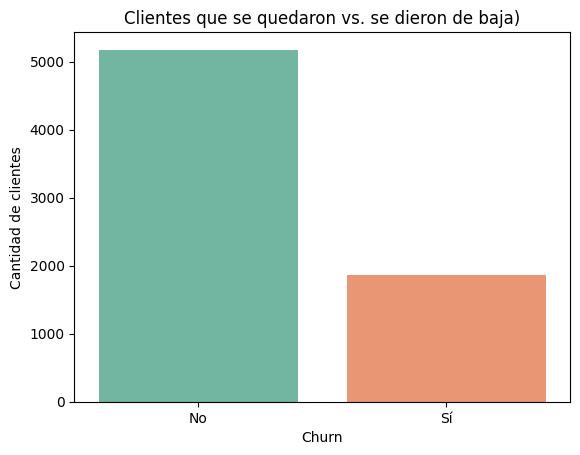

In [15]:
ax = sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Clientes que se quedaron vs. se dieron de baja)")
plt.xlabel("Churn")
plt.ylabel("Cantidad de clientes")

# Cambiar las etiquetas del eje X
ax.set_xticklabels(["No", "Sí"])

plt.show()


####Grafico de torta

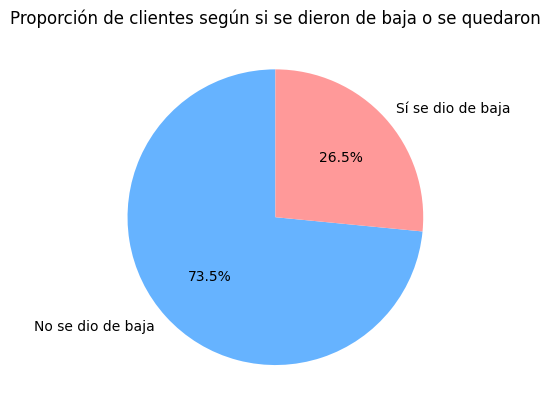

In [16]:
churn_counts = df["Churn"].value_counts()

plt.pie(churn_counts,
        labels=["No se dio de baja", "Sí se dio de baja"],
        autopct="%.1f%%",
        colors=["#66b3ff", "#ff9999"],
        startangle=90)
plt.title("Proporción de clientes según si se dieron de baja o se quedaron")
plt.show()


##Recuento de evasión por variables categóricas

#### Distribución de evasion por género

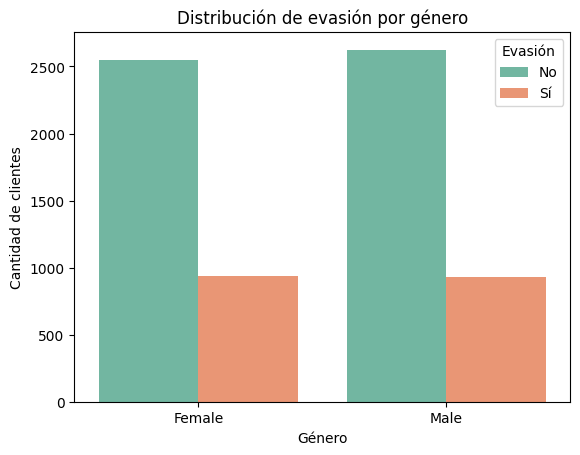

In [17]:
ax = sns.countplot(x="gender", data=df, hue="Churn", palette="Set2")
plt.title("Distribución de evasión por género")
plt.xlabel("Género")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Evasión", labels=["No", "Sí"])
plt.show()

####Distribución de churn por tipo de contrato

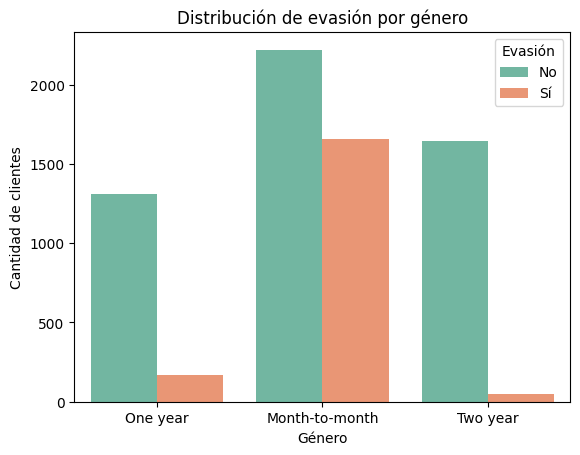

In [18]:
ax = sns.countplot(x="Contract", data=df, hue="Churn", palette="Set2")
plt.title("Distribución de evasión por género")
plt.xlabel("Género")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Evasión", labels=["No", "Sí"])
plt.show()

####Distribución de evasion por método de pago

/tmp/ipython-input-3682852709.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


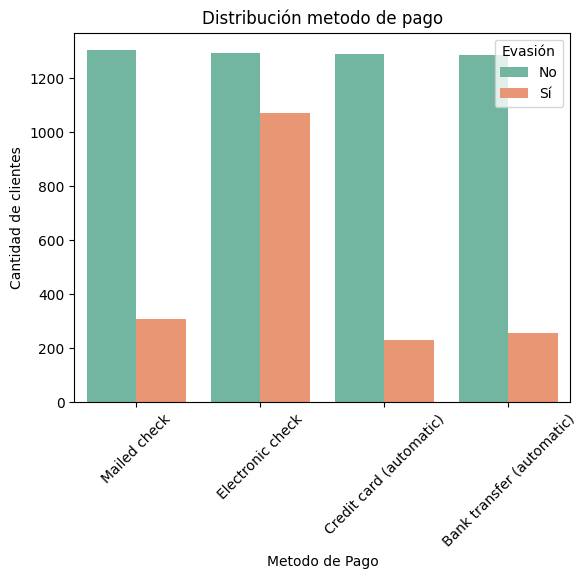

In [19]:
ax = sns.countplot(x="PaymentMethod", data=df, hue="Churn", palette="Set2")
plt.title("Distribución metodo de pago")
plt.xlabel("Metodo de Pago")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Evasión", labels=["No", "Sí"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

###Distribucion variables numericas

####Distribucion de evasion segun tiempo de contrato

/tmp/ipython-input-667933463.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="tenure", y="Churn", palette="Set2", ax=axes[1], orient="h")
/tmp/ipython-input-667933463.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_yticklabels(labels= ['No','Si'])


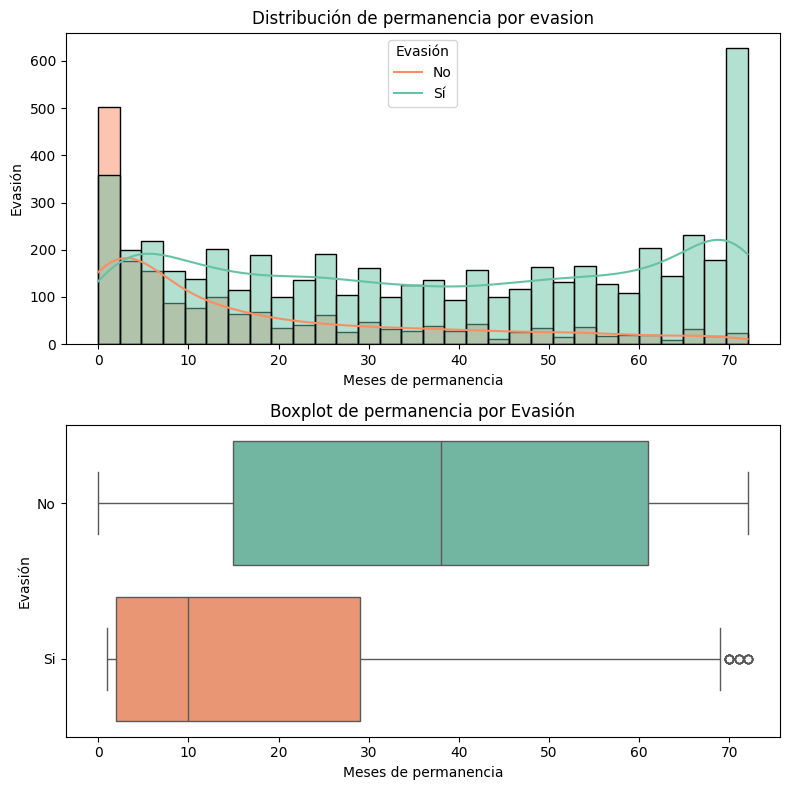

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# Histograma
sns.histplot(data=df, x="tenure", hue="Churn", kde=True, bins=30, palette="Set2", ax=axes[0])
axes[0].set_title("Distribución de permanencia por evasion")
axes[0].legend(title="Evasión", labels=["No", "Sí"])
axes[0].set_xlabel("Meses de permanencia")
axes[0].set_ylabel("Evasión")

# Boxplot
sns.boxplot(data=df, x="tenure", y="Churn", palette="Set2", ax=axes[1], orient="h")
axes[1].set_yticklabels(labels= ['No','Si'])
axes[1].set_title("Boxplot de permanencia por Evasión")
axes[1].set_xlabel("Meses de permanencia")
axes[1].set_ylabel("Evasión")

plt.tight_layout()
plt.show()

###Cargos mensuales vs evasión

/tmp/ipython-input-3894800955.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Charges_Monthly", y="Churn", palette="Set2", ax=axes[1], orient="h")
/tmp/ipython-input-3894800955.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_yticklabels(labels= ['No','Si'])


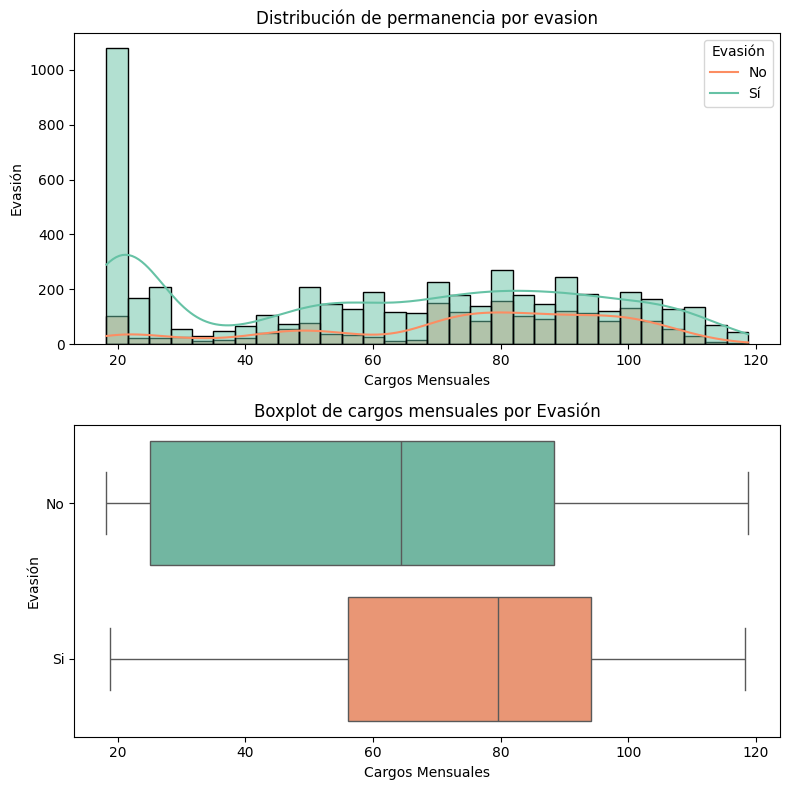

In [21]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# Histograma
sns.histplot(data=df, x="Charges_Monthly", hue="Churn", kde=True, bins=30, palette="Set2", ax=axes[0])
axes[0].set_title("Distribución de permanencia por evasion")
axes[0].legend(title="Evasión", labels=["No", "Sí"])
axes[0].set_xlabel("Cargos Mensuales")
axes[0].set_ylabel("Evasión")

# Boxplot
sns.boxplot(data=df, x="Charges_Monthly", y="Churn", palette="Set2", ax=axes[1], orient="h")
axes[1].set_yticklabels(labels= ['No','Si'])
axes[1].set_title("Boxplot de cargos mensuales por Evasión")
axes[1].set_xlabel("Cargos Mensuales")
axes[1].set_ylabel("Evasión")

plt.tight_layout()
plt.show()

###Cargos totales vs evasión

/tmp/ipython-input-1153524739.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Charges_Total", y="Churn", palette="Set2", ax=axes[1], orient="h")
/tmp/ipython-input-1153524739.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_yticklabels(labels= ['No','Si'])


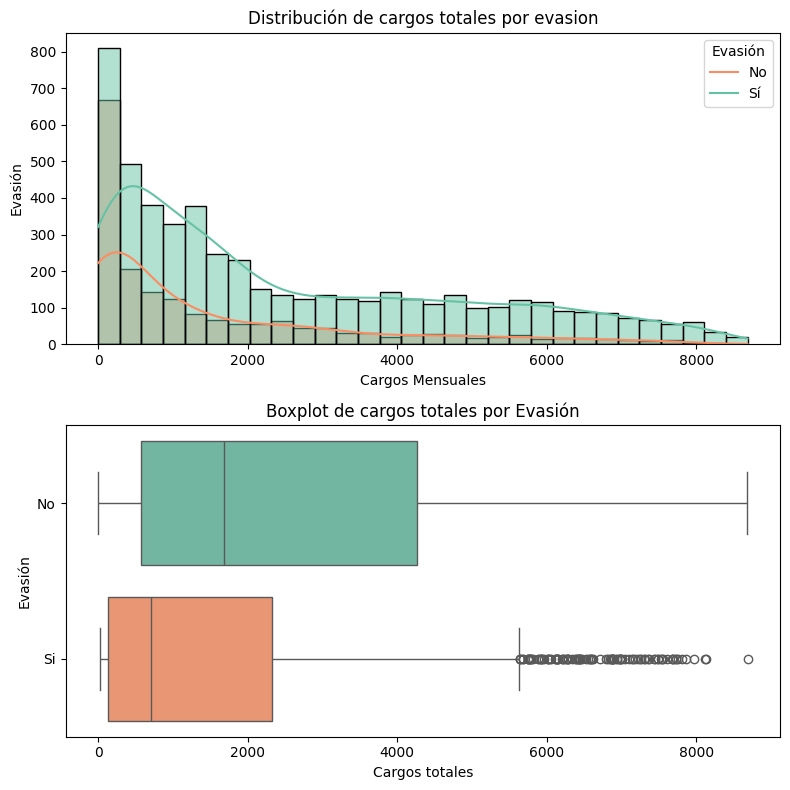

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# Histograma
sns.histplot(data=df, x="Charges_Total", hue="Churn", kde=True, bins=30, palette="Set2", ax=axes[0])
axes[0].set_title("Distribución de cargos totales por evasion")
axes[0].legend(title="Evasión", labels=["No", "Sí"])
axes[0].set_xlabel("Cargos Totales")
axes[0].set_ylabel("Evasión")

# Boxplot
sns.boxplot(data=df, x="Charges_Total", y="Churn", palette="Set2", ax=axes[1], orient="h")
axes[1].set_yticklabels(labels= ['No','Si'])
axes[1].set_title("Boxplot de cargos totales por Evasión")
axes[1].set_xlabel("Cargos totales")
axes[1].set_ylabel("Evasión")

plt.tight_layout()
plt.show()

###Dataset final

####1. Eliminar columnas irrelevantes

customerID → No aporta valor predictivo (solo identifica al cliente).

Variables que son duplicadas o derivadas de otras (ej. si Charges_Total = tenure * Charges_Monthly ± redondeo).

In [23]:
df= df.drop(columns=['customerID', 'Charges_Total'])

#📄Informe final

1. Contexto de los datos

Se dispone de un dataset con 7267 clientes, donde la variable objetivo es Churn (indica si un cliente se dio de baja o no).
Las variables incluyen información demográfica, servicios contratados, tipo de contrato, método de pago, y métricas numéricas como gasto mensual, gasto total y tiempo de permanencia.

2. Distribución de Churn

Clientes que permanecen: ~70%

Clientes que se dan de baja (Churn = Sí): ~30%

📊 Esto muestra un desbalance de clases típico en problemas de churn, lo cual será importante a la hora de modelar.

3. Variables categóricas y churn

Género: No se observaron diferencias relevantes entre hombres y mujeres en tasas de churn.

Tipo de contrato: Los clientes con contrato mensual tienen una mayor tasa de churn, mientras que los de contrato anual o de más largo plazo muestran menor propensión a cancelar.

Método de pago: Los clientes que pagan con métodos electrónicos (tarjeta, débito automático) tienen menor churn que los que utilizan cheque o pagos físicos.

Servicios adicionales: Clientes sin servicios de seguridad, respaldo en línea o soporte técnico muestran mayor churn.

4. Variables numéricas y churn

Tiempo de permanencia (tenure):
Los clientes que cancelaron suelen tener menos meses de permanencia.

Cargos mensuales (Charges_Monthly):
Los clientes con churn tienden a tener cargos mensuales más altos, posiblemente por contratar menos servicios pero más costosos.

Cargos totales (Charges_Total):
Los clientes que permanecen acumulan gastos totales más altos, lo cual está directamente relacionado con su mayor permanencia.

📊 En los histogramas y boxplots se evidenció que:

Los churners se concentran en tenure bajo (0–12 meses).

El churn es más alto en clientes con cargos mensuales elevados.

Los clientes leales acumulan mayores cargos totales.

5. Conclusiones y recomendaciones

Contratos mensuales + cargos altos + poco tiempo de permanencia son los factores más asociados al churn.

Es recomendable implementar estrategias de retención específicas para clientes con contratos cortos:

Ofrecer descuentos o beneficios al pasar a contrato anual.

Programas de fidelización en los primeros 12 meses de servicio.

Optimizar el método de pago ofreciendo incentivos a quienes utilicen débito automático o tarjeta.

Identificar clientes con poco uso de servicios adicionales (seguridad, respaldo, soporte) y ofrecer bundles o promociones para aumentar el valor percibido.

In [24]:
df

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,cuentas diarias
0,0.0,Female,0,Yes,Yes,9,Yes,0,DSL,0,1,0,1,1,0,One year,Yes,Mailed check,65.60,2.186667
1,0.0,Male,0,No,No,9,Yes,1,DSL,0,0,0,0,0,1,Month-to-month,No,Mailed check,59.90,1.996667
2,1.0,Male,0,No,No,4,Yes,0,Fiber optic,0,0,1,0,0,0,Month-to-month,Yes,Electronic check,73.90,2.463333
3,1.0,Male,1,Yes,No,13,Yes,0,Fiber optic,0,1,1,0,1,1,Month-to-month,Yes,Electronic check,98.00,3.266667
4,1.0,Female,1,Yes,No,3,Yes,0,Fiber optic,0,0,0,1,1,0,Month-to-month,Yes,Mailed check,83.90,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,Female,0,No,No,13,Yes,0,DSL,1,0,0,1,0,0,One year,No,Mailed check,55.15,1.838333
7263,1.0,Male,0,Yes,No,22,Yes,1,Fiber optic,0,0,0,0,0,1,Month-to-month,Yes,Electronic check,85.10,2.836667
7264,0.0,Male,0,No,No,2,Yes,0,DSL,0,1,0,0,0,0,Month-to-month,Yes,Mailed check,50.30,1.676667
7265,0.0,Male,0,Yes,Yes,67,Yes,0,DSL,1,0,1,1,0,1,Two year,No,Mailed check,67.85,2.261667
